In [3]:
using ApproxFun, Plots

# 1. Fourier

In [18]:
f = Fun(θ -> exp(cos(θ)+sin(θ)), Laurent())
f.coefficients

31-element Vector{ComplexF64}:
      1.5660829297563506 + 0.0im
      0.6358617281560686 + 0.6358617281560687im
      0.6358617281560686 - 0.6358617281560687im
  -4.177679020658156e-17 + 0.2943594734442135im
  -3.536528698071683e-17 - 0.2943594734442134im
    -0.04714278126764175 + 0.04714278126764174im
   -0.047142781267641744 - 0.04714278126764174im
   -0.011502785838363238 + 2.3748314352283606e-17im
   -0.011502785838363238 - 2.3852447794681098e-17im
  -0.0011316379141888318 - 0.001131637914188854im
  -0.0011316379141888305 + 0.0011316379141888522im
   3.610317755803941e-17 - 0.0001864066964746513im
   5.607365815045437e-17 + 0.00018640669647466146im
                         ⋮
   5.607365815045437e-17 + 9.011361921826234e-9im
   4.998096536585387e-17 - 9.011361919996643e-9im
  -4.080665124924811e-10 + 4.0806655325848276e-10im
 -4.0806651417299444e-10 - 4.0806655450531526e-10im
 -3.3897187357370684e-11 - 2.8406096919120216e-17im
  -3.389718714053025e-11 + 2.8696250045607476e-17im
 -1

In [14]:
f = Fun(θ -> exp(exp(im*θ)), Laurent(), 20) # example of Taylort seriesd
f.coefficients[1] # f̂₀ⁿ
f.coefficients[2] # f̂₋₁ⁿ
f.coefficients[3] # f̂₁ⁿ

f.coefficients[1:2:end] - [1/factorial(k) for k=0:9]

10-element Vector{ComplexF64}:
                    0.0 + 2.2526119005136206e-18im
                    0.0 - 1.3246554591830134e-16im
                    0.0 - 1.0349481604304853e-16im
  8.326672684688674e-17 - 3.3490242746034114e-17im
 1.1102230246251565e-16 + 7.698479954210943e-17im
 2.6020852139652106e-17 - 7.803727023639404e-18im
 -4.618701254788249e-17 + 1.884059786815931e-17im
 -1.734723475976807e-17 - 3.176789436619015e-17im
 -3.146219179281373e-17 + 2.361430238418194e-17im
 -5.490425212455012e-17 + 1.755672574113161e-17im

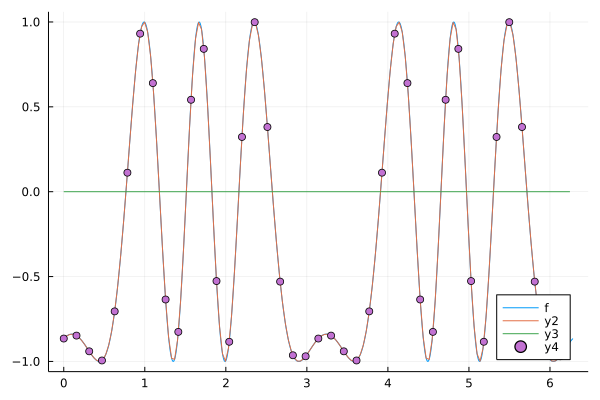

In [23]:
# Computing coefficients using Trapezium rule automatically interpolates
f = θ -> cos(10cos(θ-0.1))
n = 40
fₙ = Fun(f, Laurent(), n)
g = range(0, 2π; length=1000)
plot(g, f.(g); legend=:bottomright, label="f")
plot!(fₙ)
θ = range(0,2π;length=n+1)[1:end-1]
scatter!(θ, f.(θ))

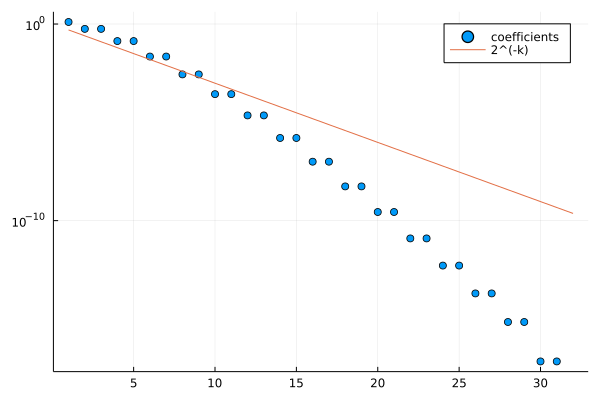

In [30]:
# smoothness (periodic-differnentiability) means faster decaying coefficients

f = Fun(θ ->exp(cos(θ-0.1)), Laurent()) # adaptively increase n
f̂ = f.coefficients
nanabs = x -> iszero(x) ? NaN : abs(x)
scatter(nanabs.(f̂); yscale=:log10, label="coefficients")
ns = 1:length(f̂)
plot!(ns, 2.0.^(-ns); label="2^(-k)")

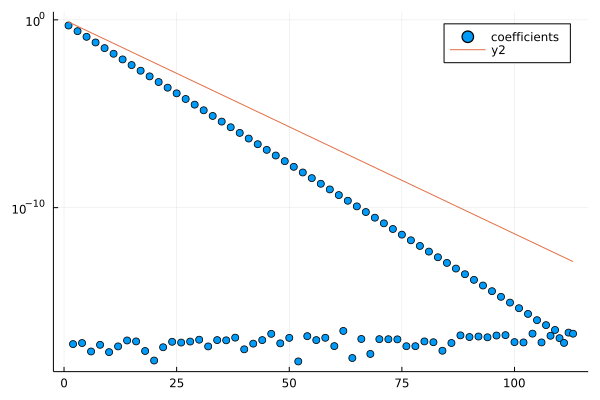

In [31]:
# exponential decay because infinitely-differentiable (+)

f = Fun(θ ->1/(exp(im*θ) + 2), Laurent()) # adaptively increase n
f̂ = f.coefficients
nanabs = x -> iszero(x) ? NaN : abs(x)
scatter(nanabs.(f̂); yscale=:log10, label="coefficients")
ns = 1:length(f̂)
plot!(ns, 1.3.^(-ns))

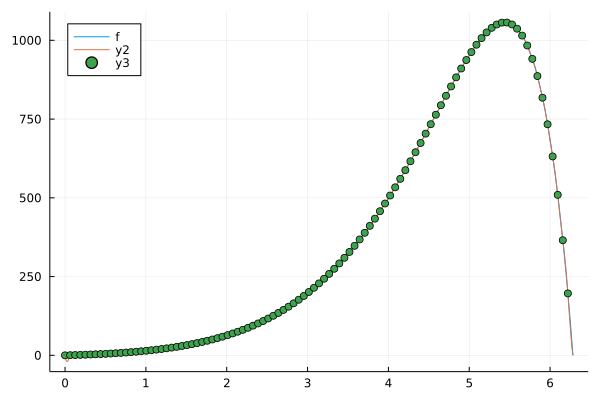

In [45]:
f = θ -> exp(θ) * θ * (2π-θ)
n = 100
fₙ = Fun(f, Laurent(), n)
g = range(0, 2π; length=10_000)
plot(g, f.(g); legend=:topleft, label="f")
plot!(g, real.(fₙ.(g)))
θ = range(0,2π;length=n+1)[1:end-1]
scatter!(θ, f.(θ))

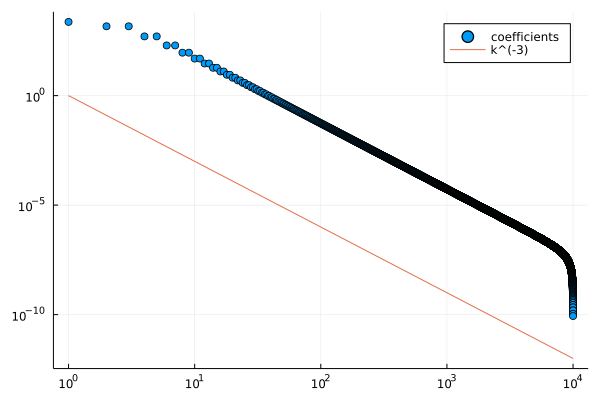

In [52]:
# with enough periodic continuity we ghet faster decaying coefficients

f = Fun(θ ->(θ * (2π-θ))^2 * exp(θ), Laurent(), 10_000)
f̂ = f.coefficients
nanabs = x -> iszero(x) ? NaN : abs(x)
scatter(nanabs.(f̂); yscale=:log10, xscale=:log10, label="coefficients")
ns = 1:length(f̂)
plot!(ns, ns .^(-3); label="k^(-3)")

## Applications
### a. Differentiation

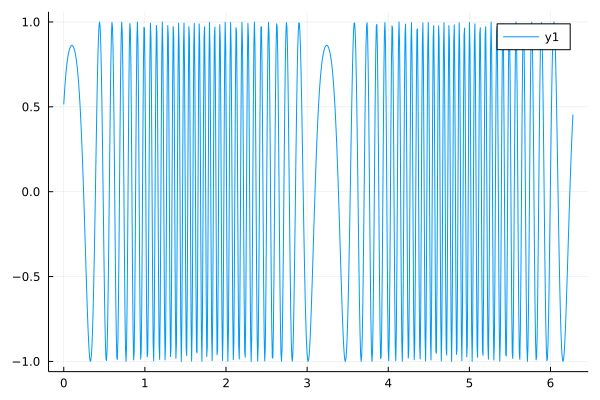

In [75]:
f = Fun(θ -> cos(100cos(θ-0.1)), Laurent())
plot(real(f))
#plot!(real(f')) # f' computes derivative by multiplying Fourier coefficients by i*k

In [76]:
f'(0.4) - 100sin(100cos(0.4-0.1))*sin(0.4-0.1) # 13 digits!

-4.476419235288631e-13 + 1.5987211554602254e-14im

In [78]:
# compare with central differences
h = cbrt(eps())
(f(0.4+h)-f(0.4-h))/(2h) - f'(0.4) # only 7 digits!

-1.6640001021528406e-7 - 1.237722713209644e-10im

## b. roots of functions

## c. 

# 2. Orthogonal polynomials

In [53]:
f = Fun(exp, Chebyshev())

f.coefficients

14-element Vector{Float64}:
 1.2660658777520084
 1.1303182079849703
 0.27149533953407656
 0.04433684984866379
 0.0054742404420936785
 0.0005429263119139232
 4.497732295427654e-5
 3.19843646253781e-6
 1.992124804817033e-7
 1.1036771869970875e-8
 5.505896578301994e-10
 2.4979607981699334e-11
 1.0391104209722668e-12
 3.993680386393805e-14

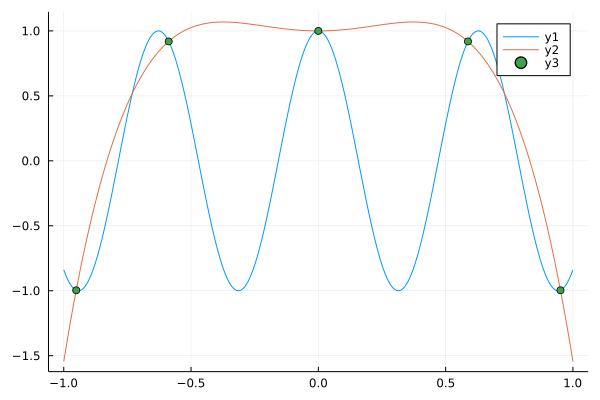

In [76]:
f = x -> cos(10x)
fₙ = Fun(f, Chebyshev(), 5)
g = range(-1,1;length=1000)
plot(g, f.(g))
plot!(g, fₙ.(g))
r = roots(Fun(Chebyshev(), [zeros(5);1]))
scatter!(r, f.(r))

# 3. Applications (non-examinable)

## a. Differentiation

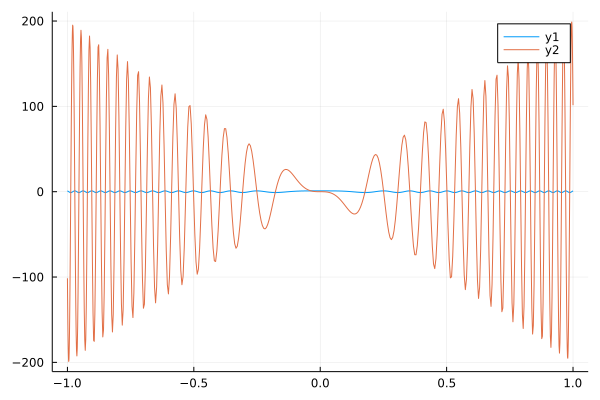

In [69]:
f = Fun(x -> cos(100x^2), Chebyshev())
plot(f)
plot!(f')

In [57]:
f'(0.1) + 2*100*0.1*sin(100*0.1^2)

1.8118839761882555e-13

In [60]:
h = cbrt(eps())
(f(0.1+h) - f(0.1-h))/(2h) - f'(0.1)

1.4917631574462575e-9

## b. Root finding and optimisation

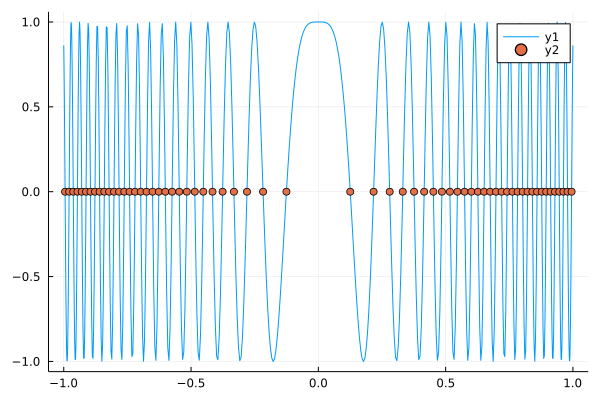

In [89]:
f = Fun(x -> cos(100x^2), Chebyshev())
plot(f)
r = roots(f)
scatter!(r, zero(r))

In [66]:
plot(f)
roots(f')

LoadError: MethodError: no method matching *(::LinearAlgebra.Transpose{Float64, StaticArrays.MVector{2, Float64}}, ::ApproxFunBase.DerivativeWrapper{TimesOperator{Float64, Tuple{Int64, Int64}}, ChebyshevDirichlet{1, 1, ChebyshevInterval{Float64}, Float64}, Int64, Float64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/operators.jl:655
[0m  *([91m::LinearAlgebra.Adjoint{<:Any, <:ApproxFunBase.QROperatorQ}[39m, ::Any; kwds...) at ~/.julia/packages/ApproxFunBase/vVgJc/src/Operators/qr.jl:163
[0m  *([91m::ApproxFunOrthogonalPolynomials.LaguerreTransformPlan[39m, ::Any) at ~/.julia/packages/ApproxFunOrthogonalPolynomials/QcyFy/src/Spaces/Laguerre/Laguerre.jl:148
[0m  ...

## c. Linear ODEs

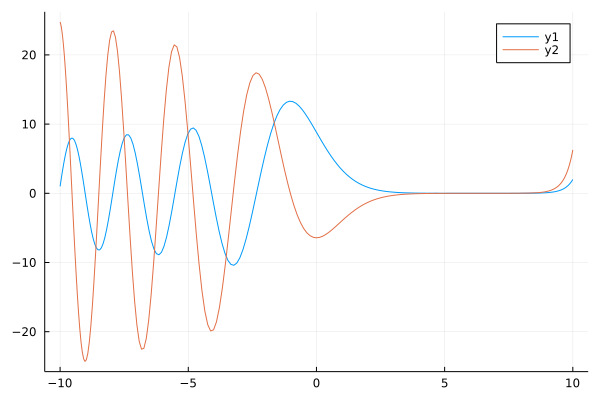

In [64]:

# Airy equation as a BVP
# u(-10) = c_0
# u(10) = c_1
# u'' = x *u


D = Derivative()
x = Fun(-10..10)

u = [Dirichlet();
    D^2 - x] \ [[1.,2.],0]

plot(u)
plot!(u')

## d. Linear PDEs

In [65]:
d = ChebyshevInterval()^2                   # Defines a rectangle
Δ = Laplacian(d)                            # Represent the Laplacian
f = ones(∂(d))                              # one at the boundary
u = \([Dirichlet(d); Δ+100I], [f;0.];       # Solve the PDE
                tolerance=1E-5)             
surface(u)                                  # Surface plot

LoadError: UndefVarError: I not defined

In [ ]:
|